# Distribution for authors with at least 15 publications
#### (so 10346 authors, the 4.44% of the total data) 
#### -> fitting Power law, Power law with exponential cut off and exponential 

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit # The module that contains the curve_fit routine

import warnings
warnings.filterwarnings("ignore")

# Import own libraries 
import os, sys
script_path = os.path.realpath(os.path.dirname("10_on_trajectories"))
os.chdir(script_path)
sys.path.append("..")

from myLibraries.queries import * 
from myLibraries.rawData_queries import *
from myLibraries.events import *
from myLibraries.theoretical_functions import *
from myLibraries.utils import *

In [2]:
HOLE_SIZE = 28
ACTIVITY = 0
MIN_PUBS = 15

In [3]:
df = get_all_collabs()

df = df[df["2018"] != 0]
df = df[df["max_hole_size"] <= HOLE_SIZE]
df = df[df["activity"] >= ACTIVITY]
df = df[df["tot_pubs"] >= MIN_PUBS]

colls = df["2018"].values

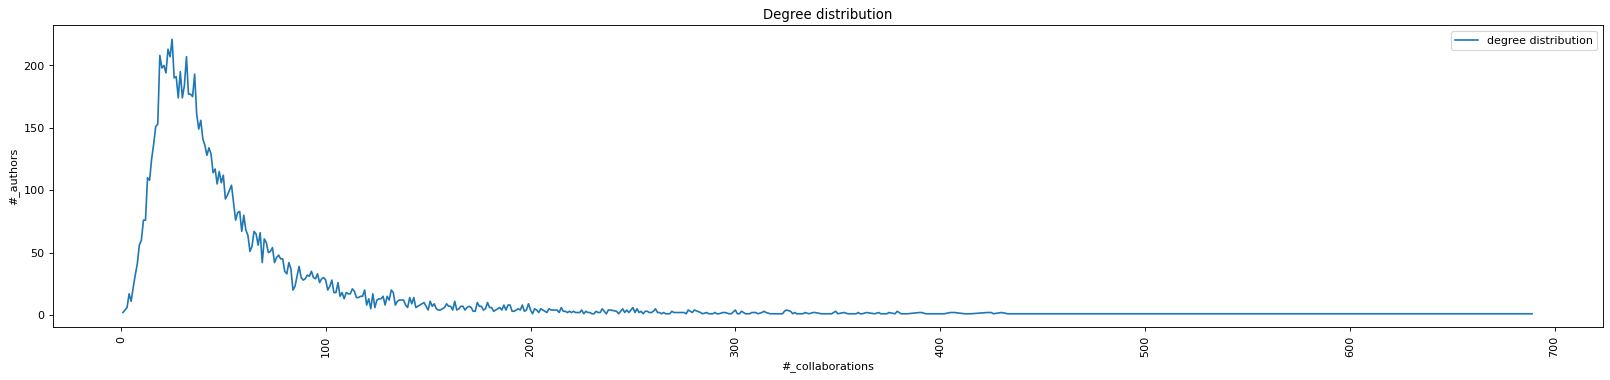

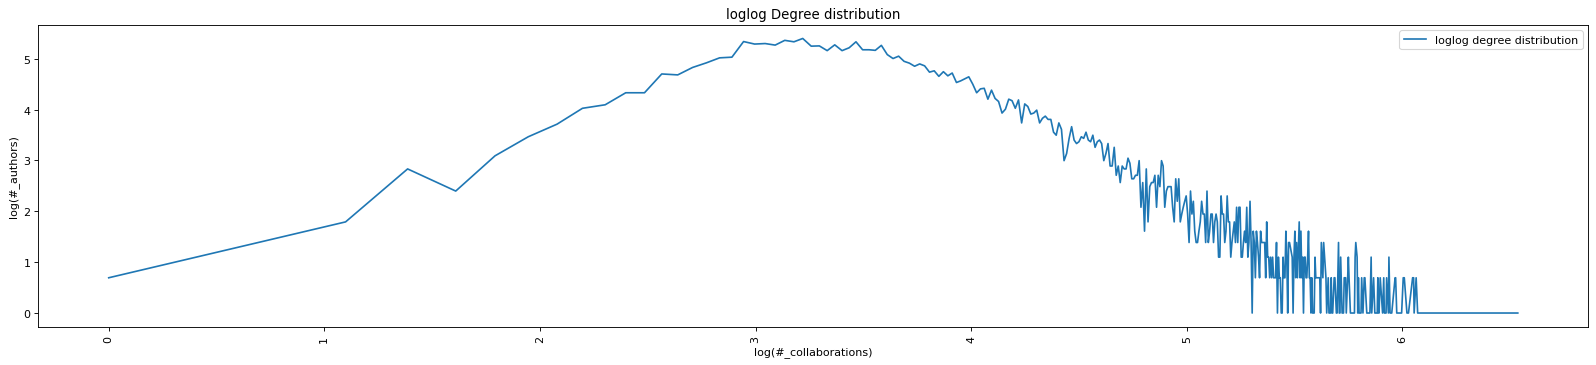

In [4]:
# DD

unique, counts = np.unique(colls, return_counts=True)
x, y = unique, counts  

draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# computing M_k with k>=18 to avoid the starting pike 

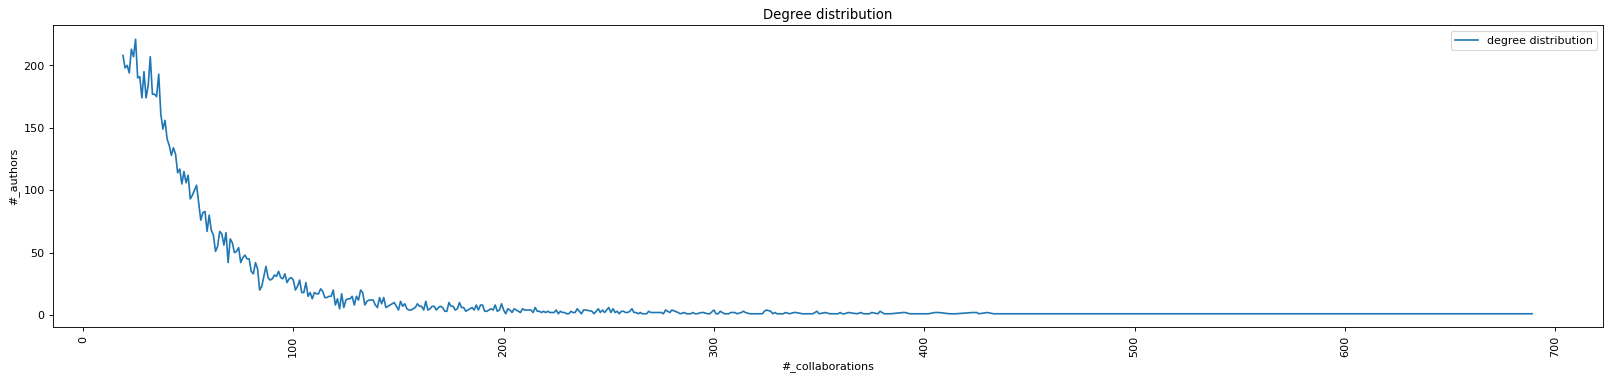

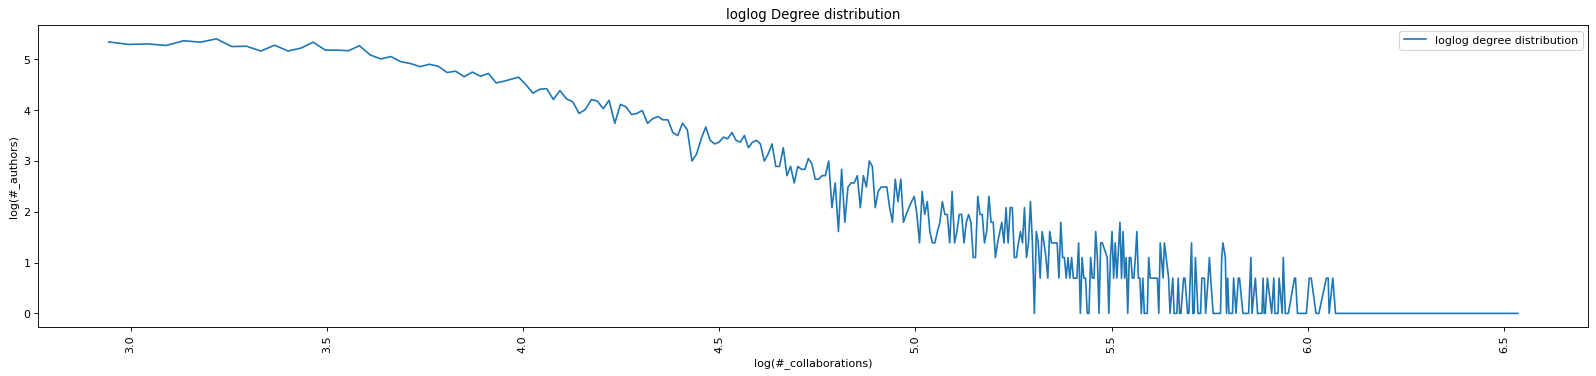

In [5]:
# DD
unique, counts = np.unique(colls, return_counts=True)
x, y = unique[18:], counts[18:]  


draw("Degree distribution", "#_collaborations", "#_authors", x, [y], ["degree distribution"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y)], ["loglog degree distribution"], 25, 5)

# Powerlaw fitting

In [6]:
# powerlaw 
def powerlaw(x,c, gamma):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], - gamma))
   
    return y

def fit_powerlaw(xdata, ydata):
    popt, pcov = curve_fit(powerlaw, xdata, ydata, bounds=([0,1], [np.inf, np.inf]))
    c = popt[0]
    gamma = popt[1]

    print('Power law fit with parameters -> c:', c, ', gamma:', gamma)
    
    return powerlaw(xdata, c, gamma), c, gamma

# powerlaw_exp_cutoff 
def powerlaw_exp_cutoff(x,c, gamma, sigma):
    y = []
    for i in range(len(x)):
        y.append(c*pow(x[i], - gamma) * pow(sigma, x[i]))
    return y

def fit_powerlaw_exp_cutoff(xdata, ydata):
    popt, pcov = curve_fit(powerlaw_exp_cutoff, xdata, ydata, bounds=([0, 1, 0], [np.inf, np.inf, 2]))
    c = popt[0]
    gamma = popt[1]
    sigma = popt[2]

    print('Power law with exponential cutoff fit with parameters -> c:', c, ', gamma:', gamma, ', sigma:', sigma)
    
    return powerlaw_exp_cutoff(xdata, c, gamma, sigma), c, gamma, sigma

# exponential 
def exponential(x, c, exp):
    y = []
    for i in range(len(x)):
        y.append(c*pow(exp, x[i]))
    return y

def fit_exponential(xdata, ydata):
    popt, pcov = curve_fit(exponential, xdata, ydata)
    c = popt[0]
    exp = popt[1]

    print('exponential fit with parameters -> a:', exp, 'c:', c)
    
    return exponential(xdata, c, exp), c, exp



Power law fit with parameters -> c: 14398.1836500398 , gamma: 1.3249908568719542
Power law with exponential cutoff fit with parameters -> c: 6165.763566188241 , gamma: 1.0000000000000002 , sigma: 0.992927095263816
exponential fit with parameters -> a: 0.9731707271314797 c: 398.3047660376982


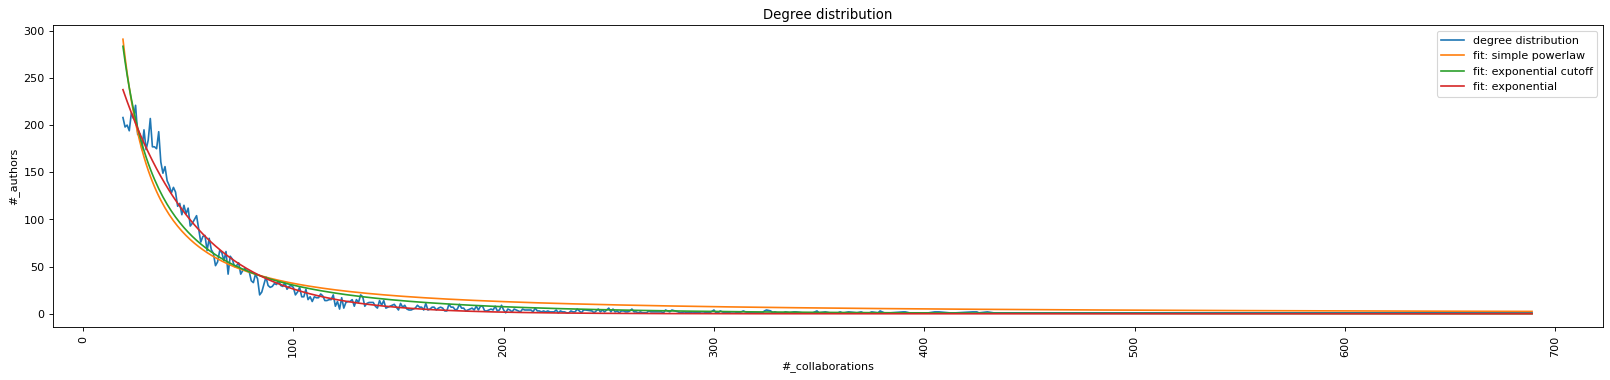

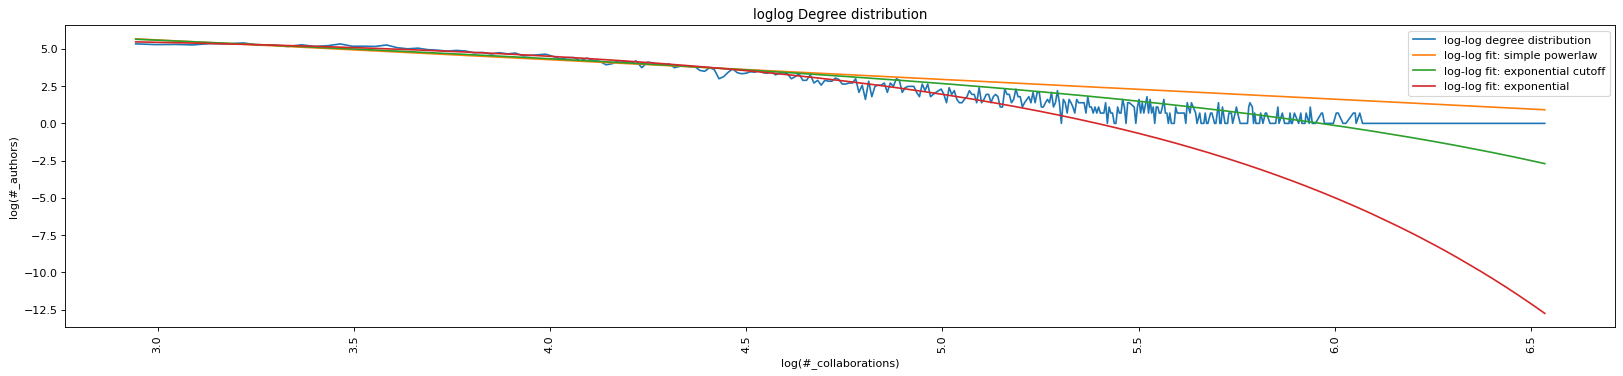

In [7]:
# fitting with power law and power law with exponential cutoff 
my_powerlaw_Fit = fit_powerlaw(x, y)[0]
my_powerlaw_cutoff_Fit = fit_powerlaw_exp_cutoff(x, y)[0]
exp_fit = fit_exponential(x, y)[0]

draw("Degree distribution",  "#_collaborations", "#_authors", x, [y, my_powerlaw_Fit, my_powerlaw_cutoff_Fit, exp_fit], ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff", "fit: exponential"], 25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", np.log(x), [np.log(y), np.log(my_powerlaw_Fit), np.log(my_powerlaw_cutoff_Fit), np.log(exp_fit) ], ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff", "log-log fit: exponential"], 25, 5)

# Errors

In [8]:
def err(y1,y2):
    err = 0
    for i in range(len(y1)):
        err += pow(abs(y1[i] - y2[i]), 2)
    return err

print("power law err:", err(my_powerlaw_Fit, y))
print("exp err:", err(exp_fit, y))
print("power law cutoff err:", err(my_powerlaw_cutoff_Fit, y))


power law err: 70712.43627857584
exp err: 14847.868834522189
power law cutoff err: 44527.414068257356


# Sliding starting k


starting x = 20 

Power law fit with parameters -> c: 20683.503097768007 , gamma: 1.4117566477567915
Power law with exponential cutoff fit with parameters -> c: 6760.523996633464 , gamma: 1.0000000000000002 , sigma: 0.9917241352594485
exponential fit with parameters -> a: 0.9723184310080123 c: 418.39351343322465

power law err: 53567.84107993399
exp err: 12394.728607326208
power law cutoff err: 31190.733733075926


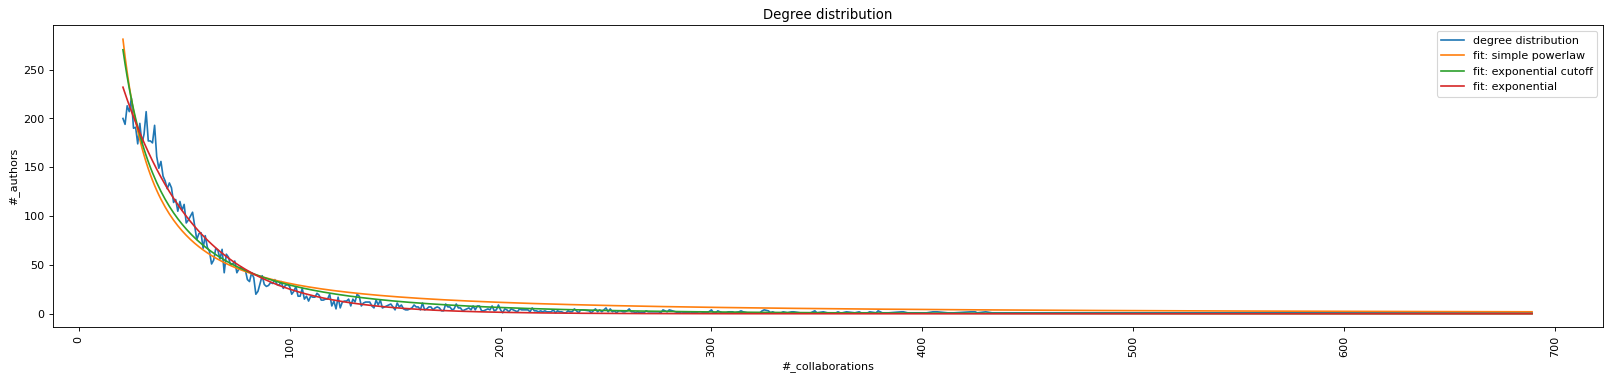

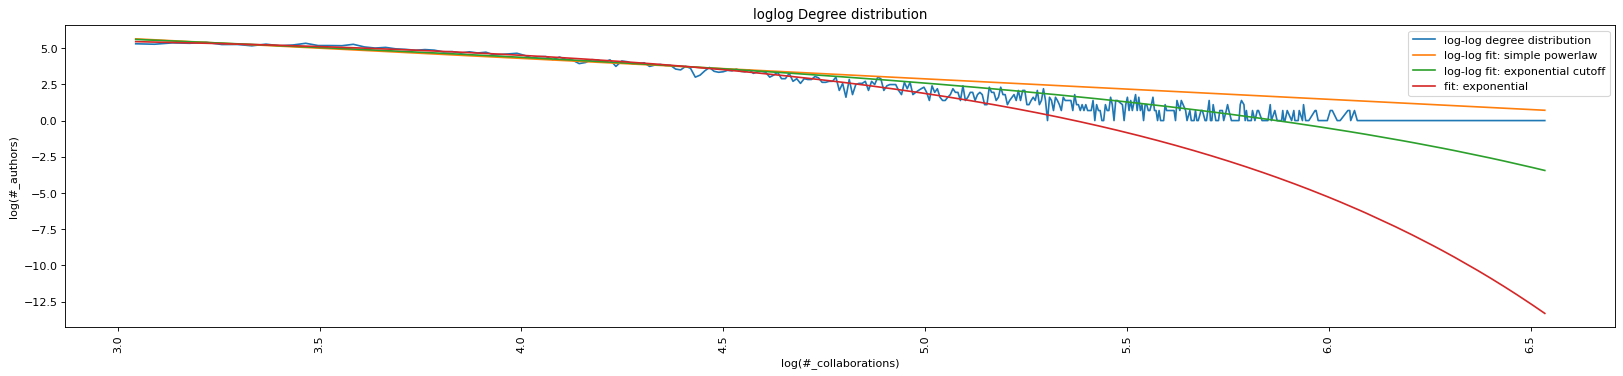




starting x = 30 

Power law fit with parameters -> c: 126180.82419295098 , gamma: 1.8445539637242458
Power law with exponential cutoff fit with parameters -> c: 9860.466520132537 , gamma: 1.0000000233611976 , sigma: 0.9864155071674199
exponential fit with parameters -> a: 0.9690755213796679 c: 508.5085062930446

power law err: 10206.411322018206
exp err: 7100.141633161656
power law cutoff err: 5627.6397213354385


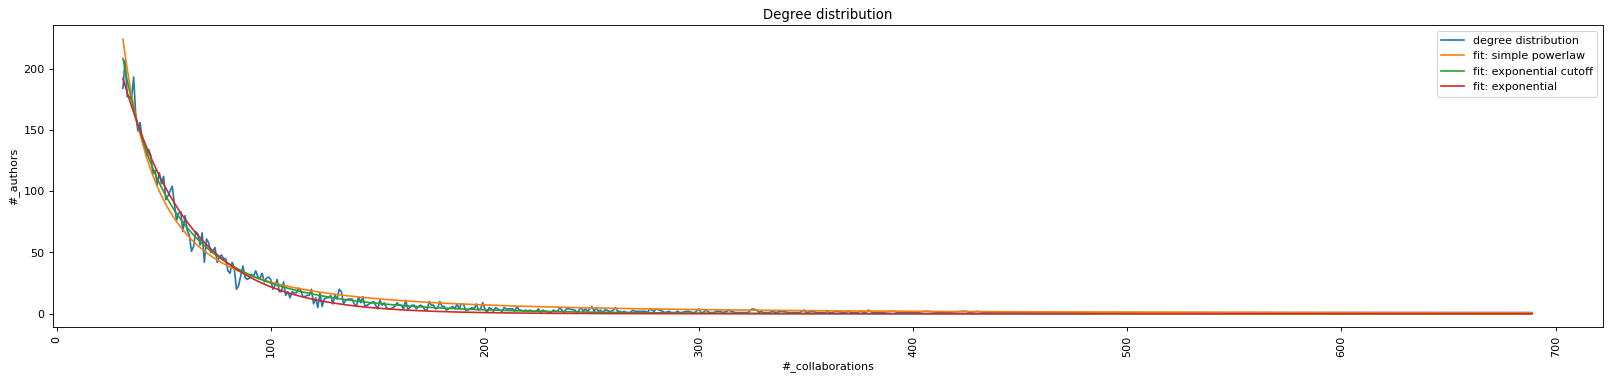

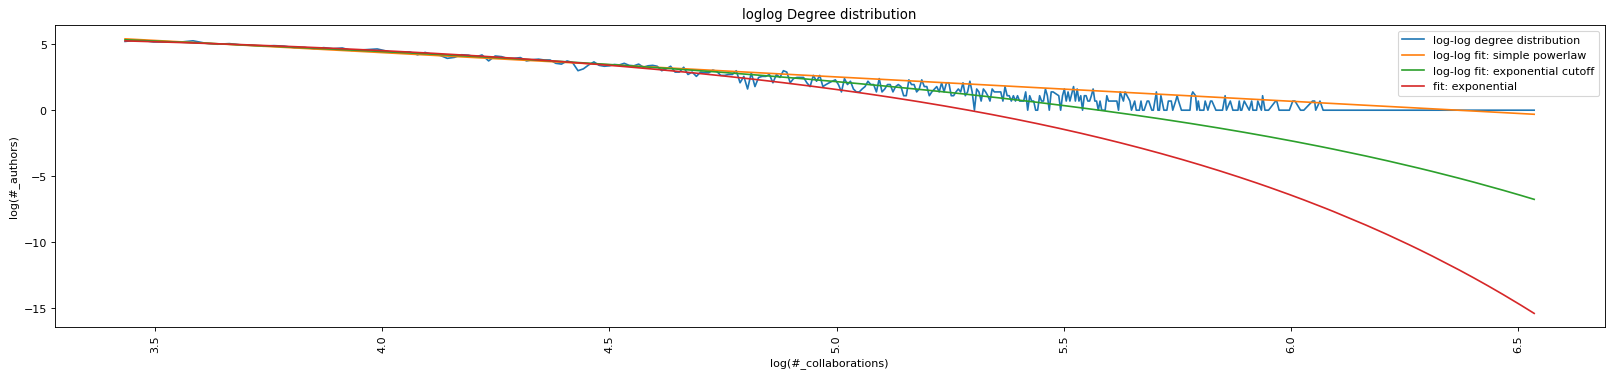




starting x = 40 

Power law fit with parameters -> c: 322359.923814285 , gamma: 2.06502989763363
Power law with exponential cutoff fit with parameters -> c: 21981.370970514952 , gamma: 1.2343666363019632 , sigma: 0.9889362664146172
exponential fit with parameters -> a: 0.9713107188362838 c: 435.4111887462756

power law err: 4937.703267315337
exp err: 5049.642205900608
power law cutoff err: 3900.8642598987276


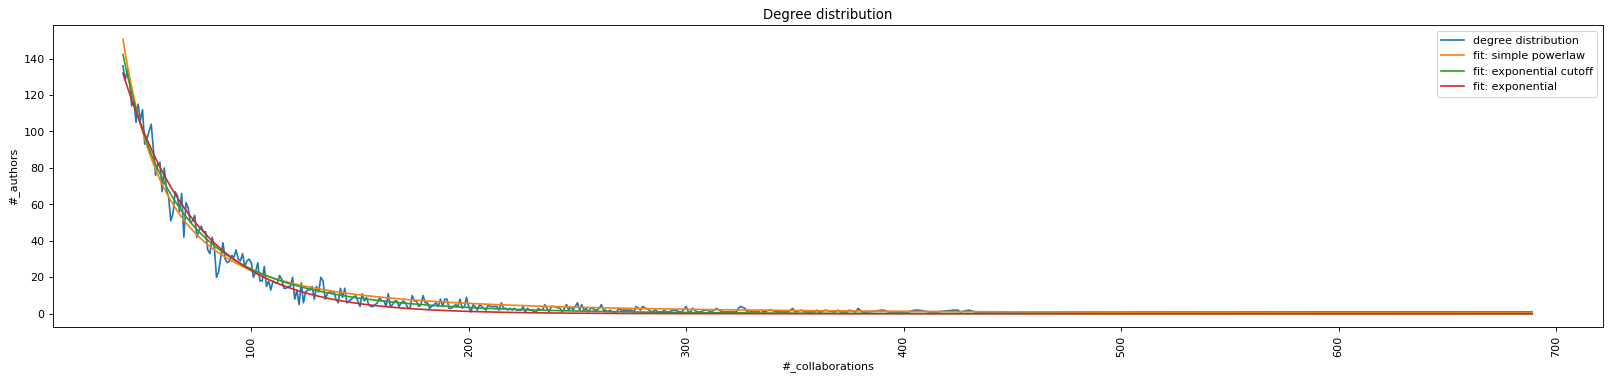

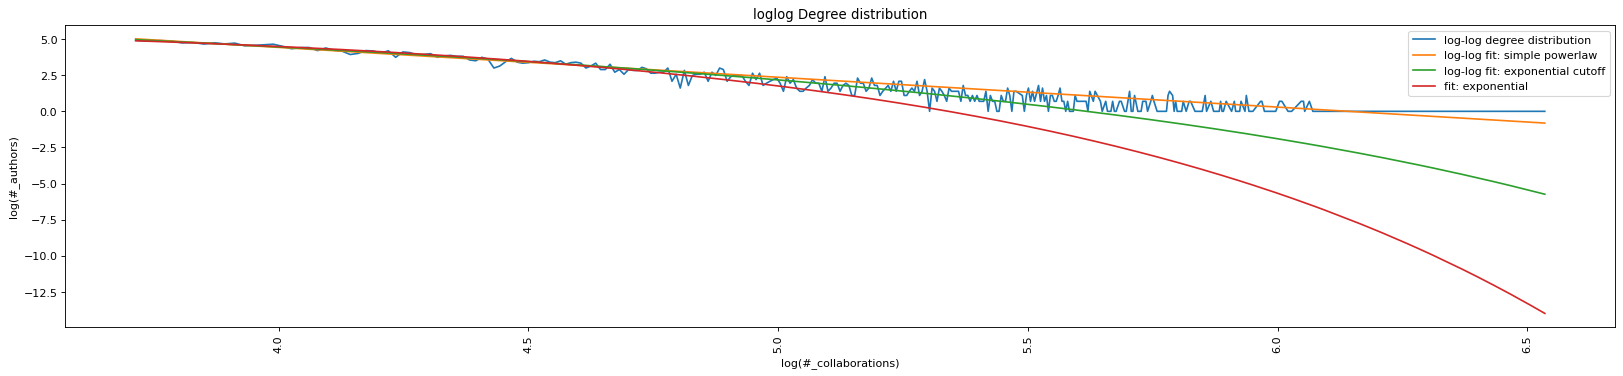




starting x = 50 

Power law fit with parameters -> c: 744903.4689012637 , gamma: 2.2551499557288004
Power law with exponential cutoff fit with parameters -> c: 185266.518482823 , gamma: 1.8479381087934148 , sigma: 0.9954286883210092
exponential fit with parameters -> a: 0.9732544140283679 c: 371.40206758202635

power law err: 3406.235172706781
exp err: 4395.633519627744
power law cutoff err: 3296.9069042253714


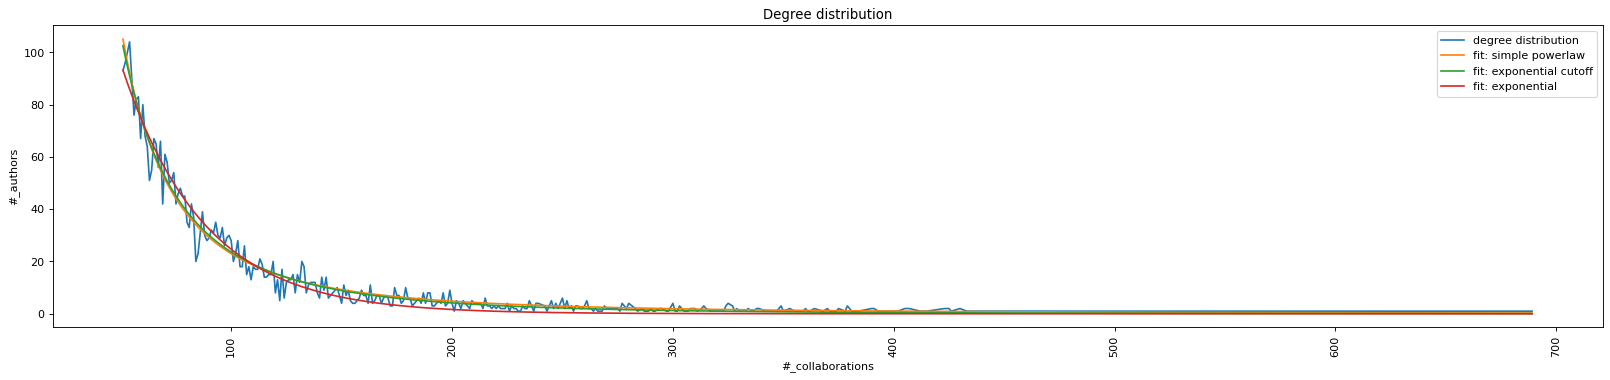

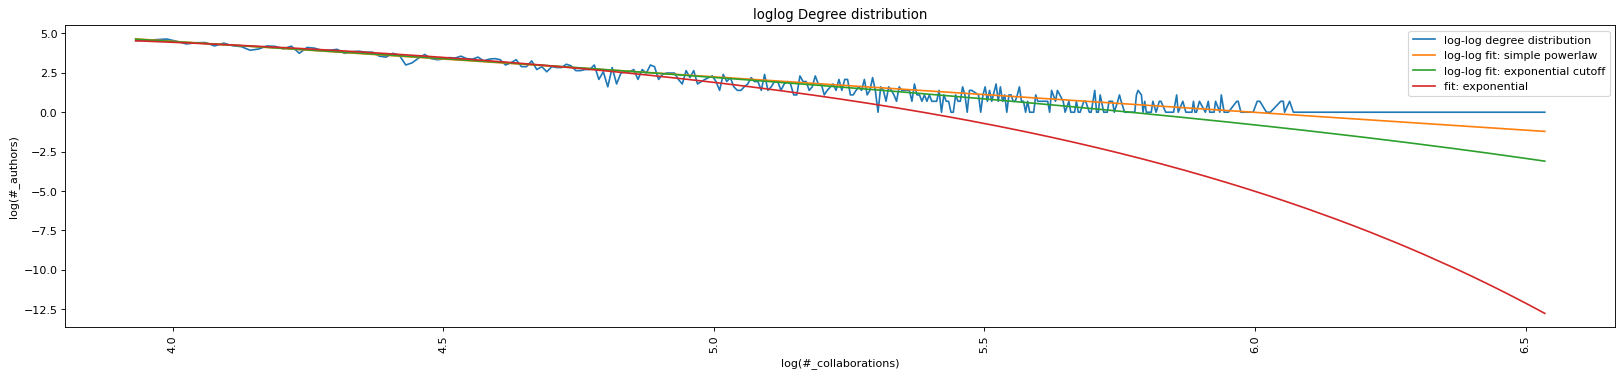




starting x = 60 

Power law fit with parameters -> c: 941274.4133025453 , gamma: 2.3067905441662653
Power law with exponential cutoff fit with parameters -> c: 173198.09272805732 , gamma: 1.8320660970943303 , sigma: 0.9953632484435743
exponential fit with parameters -> a: 0.9764122347395753 c: 275.79670651846345

power law err: 2838.3436125480794
exp err: 3224.411473125314
power law cutoff err: 2779.3792857454514


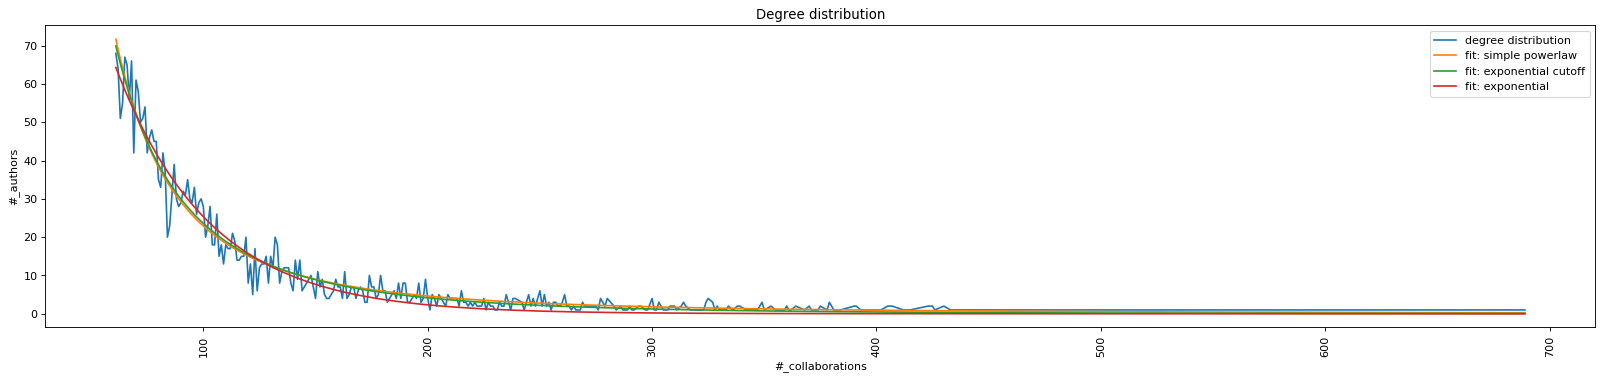

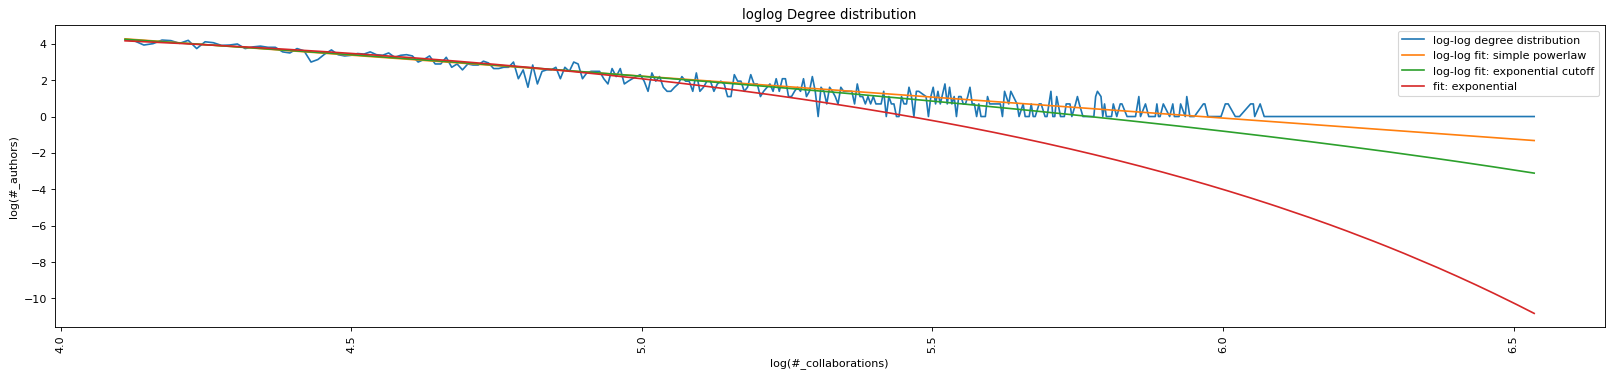




starting x = 70 

Power law fit with parameters -> c: 2046299.755265671 , gamma: 2.472960806318408
Power law with exponential cutoff fit with parameters -> c: 5191395.987324693 , gamma: 2.724200750444882 , sigma: 1.0021467932346617
exponential fit with parameters -> a: 0.9774363009815202 c: 246.5422118413622

power law err: 1967.379417598397
exp err: 2566.5023984542972
power law cutoff err: 1956.6641674717546


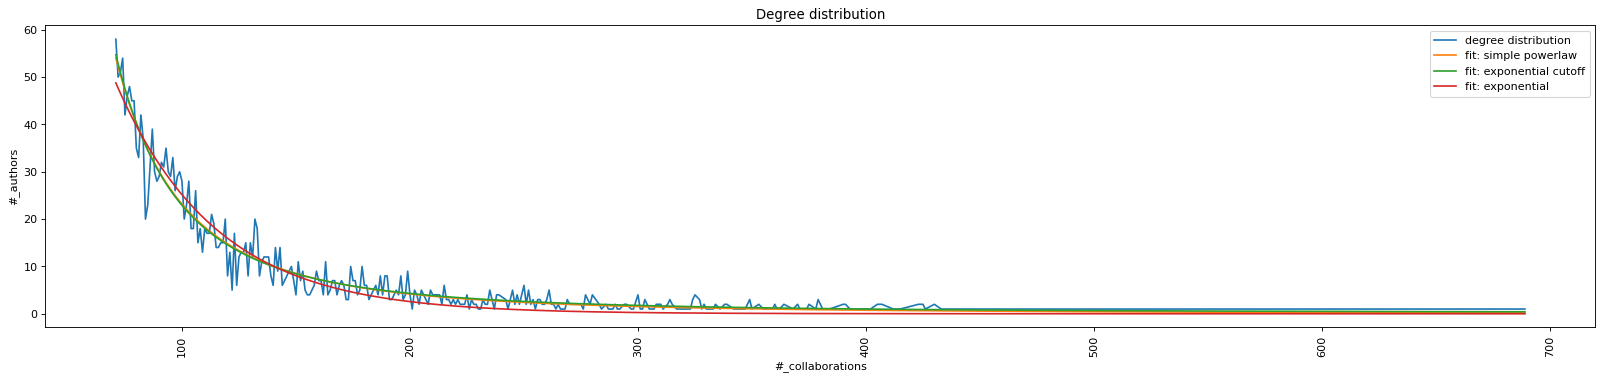

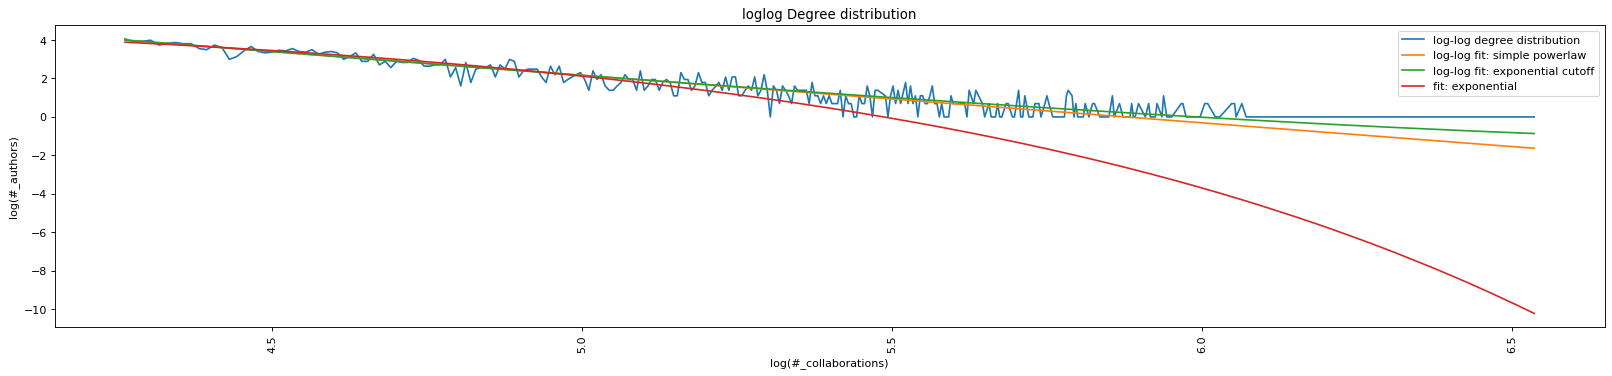




starting x = 80 

Power law fit with parameters -> c: 1505530.2809294004 , gamma: 2.409085980470326
Power law with exponential cutoff fit with parameters -> c: 2167759.1981650535 , gamma: 2.5045150939963756 , sigma: 1.0007306595520578
exponential fit with parameters -> a: 0.9805636787237381 c: 169.30795810282487

power law err: 1822.8655621396351
exp err: 2079.0659589402526
power law cutoff err: 1822.1512592746203


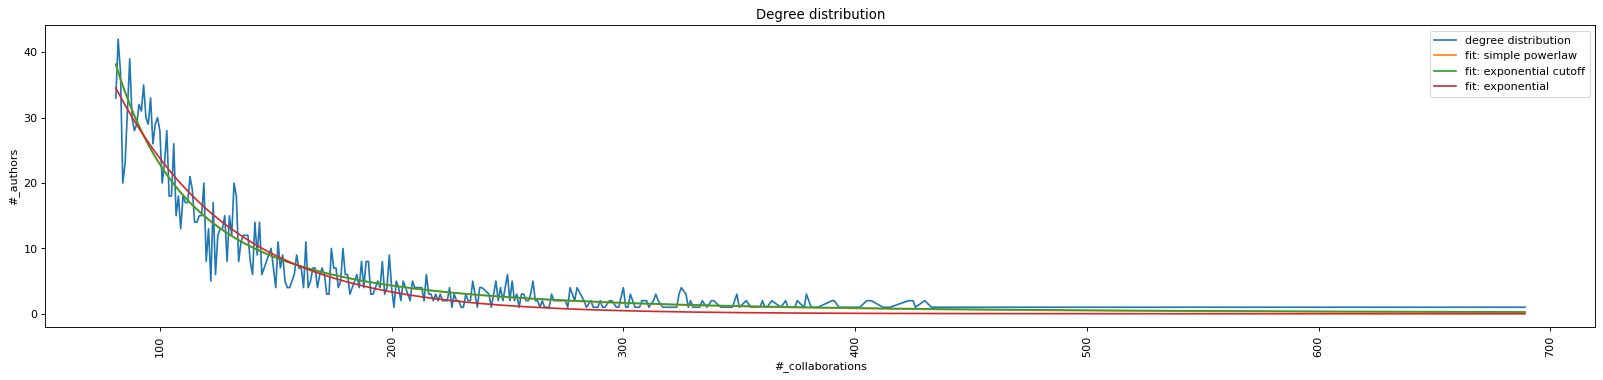

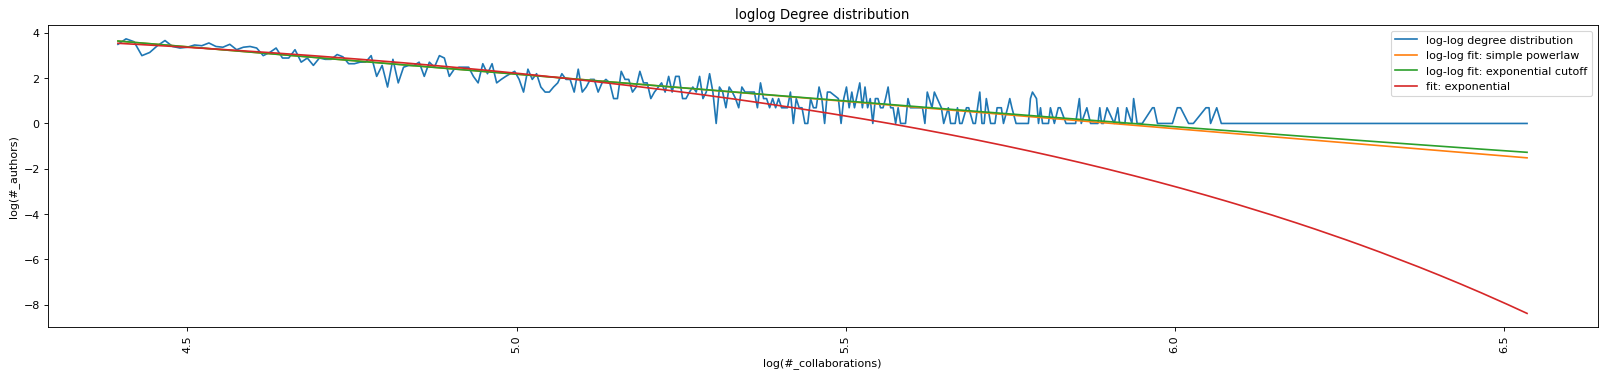




starting x = 90 

Power law fit with parameters -> c: 5329839.455526324 , gamma: 2.666918556922269
Power law with exponential cutoff fit with parameters -> c: 378328555.5087377 , gamma: 3.752327539487139 , sigma: 1.0075094744659776
exponential fit with parameters -> a: 0.9801123292135413 c: 179.8082622044852

power law err: 1274.550848474183
exp err: 1684.3558061830684
power law cutoff err: 1187.3386276226072


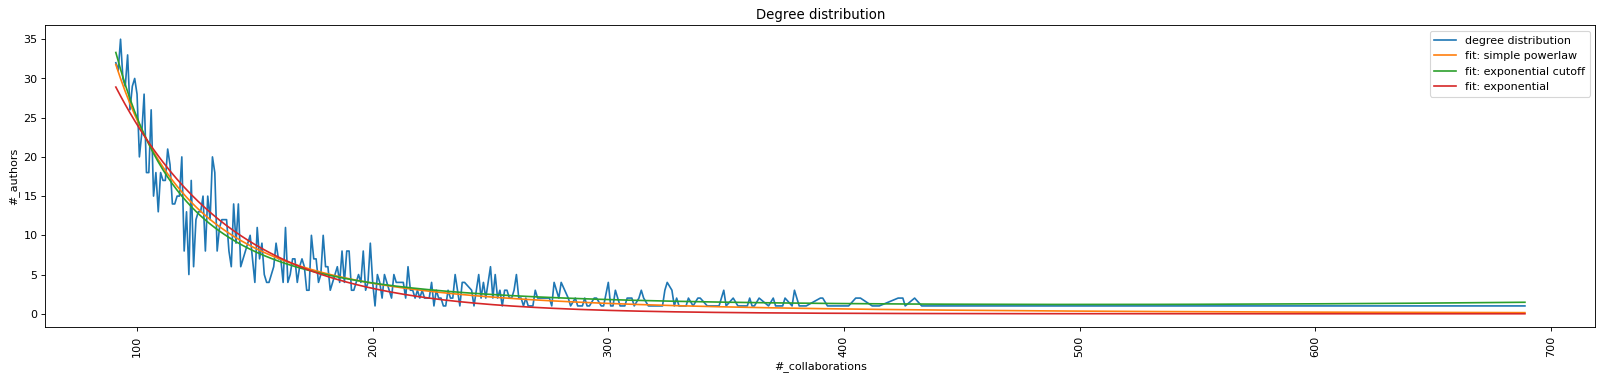

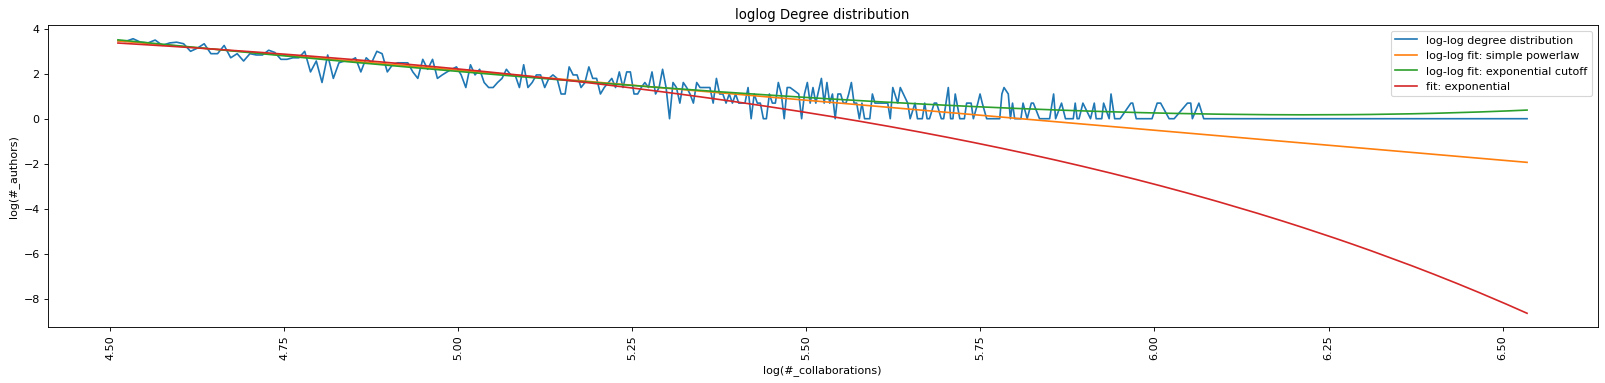




starting x = 100 

Power law fit with parameters -> c: 1336803.582499823 , gamma: 2.3905703638179605
Power law with exponential cutoff fit with parameters -> c: 36469713.73021435 , gamma: 3.209079416492866 , sigma: 1.005053026613195
exponential fit with parameters -> a: 0.9844541956694334 c: 95.20991719431458

power law err: 1105.20963155463
exp err: 1282.3933052634684
power law cutoff err: 1081.3606293714236


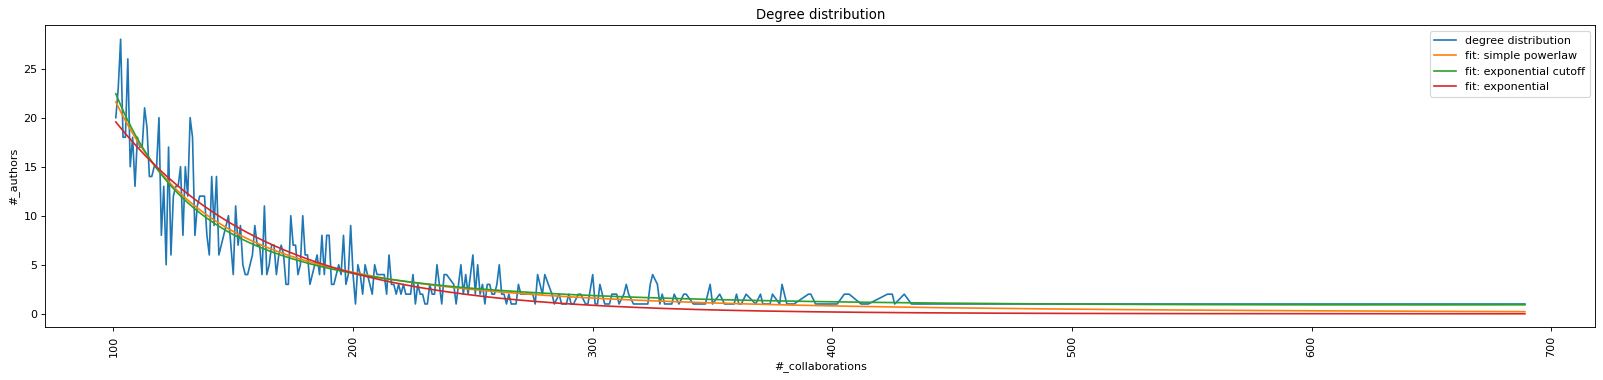

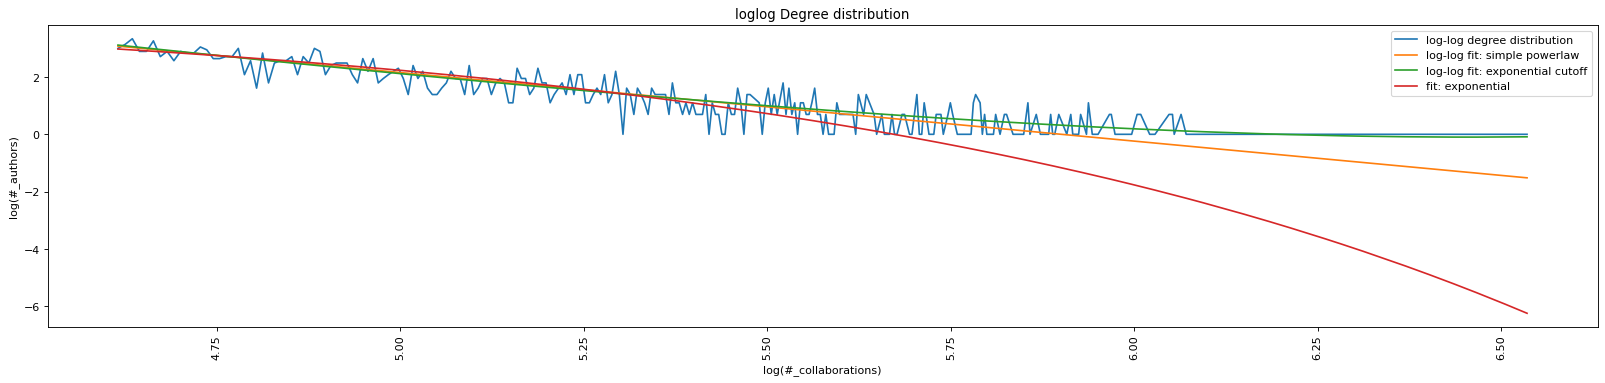

In [9]:
results = pd.DataFrame()

pl_errs = []
cutoff_errs = []
exp_errs = []
start_xs = [20, 30, 40, 50, 60, 70, 80, 90, 100]

for i in start_xs:
    
    print()
    print("starting x =",i, "\n")
    x, y = unique[i:], counts[i:]  
    my_powerlaw_Fit = fit_powerlaw(x, y)[0]
    my_powerlaw_cutoff_Fit = fit_powerlaw_exp_cutoff(x, y)[0]
    exp_fit = fit_exponential(x, y)[0]
    print()
    
    err_pl =  err(my_powerlaw_Fit, y)
    err_exp = err(exp_fit, y)
    err_cutoff = err(my_powerlaw_cutoff_Fit, y)
    
    pl_errs.append(err_pl)
    cutoff_errs.append(err_cutoff)
    exp_errs.append(err_exp)
    
    print("power law err:", err(my_powerlaw_Fit, y))
    print("exp err:", err(exp_fit, y))
    print("power law cutoff err:", err(my_powerlaw_cutoff_Fit, y))
    
    draw("Degree distribution",
         "#_collaborations", "#_authors",
         x,
         [y, my_powerlaw_Fit, my_powerlaw_cutoff_Fit, exp_fit], 
         ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff", "fit: exponential"],
         25, 5)
    
    
    draw("loglog Degree distribution",  
         "log(#_collaborations)", 
         "log(#_authors)", 
         np.log(x), 
         [np.log(y), np.log(my_powerlaw_Fit), np.log(my_powerlaw_cutoff_Fit), np.log(exp_fit)],
         ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff", "fit: exponential"], 25, 5)
        
    print("\n==============================\n")
    
results["start_x"] = start_xs
results["Power law err"] = pl_errs
results["Power law with cutoff err"] = cutoff_errs
results["Exponential err"] = exp_errs

    

In [10]:
results

,start_x,Power law err,Power law with cutoff err,Exponential err
0,20,53567.841080,31190.733733,12394.728607
1,30,10206.411322,5627.639721,7100.141633
2,40,4937.703267,3900.864260,5049.642206
3,50,3406.235173,3296.906904,4395.633520
4,60,2838.343613,2779.379286,3224.411473
5,70,1967.379418,1956.664167,2566.502398
6,80,1822.865562,1822.151259,2079.065959
7,90,1274.550848,1187.338628,1684.355806
8,100,1105.209632,1081.360629,1282.393305


# is the error function working?

In [48]:
def err(y1,y2):
    err = 0
    for i in range(len(y1)):
        err += pow(abs(y1[i] - y2[i]), 2)
    return err

In [49]:
CHUNK = 201

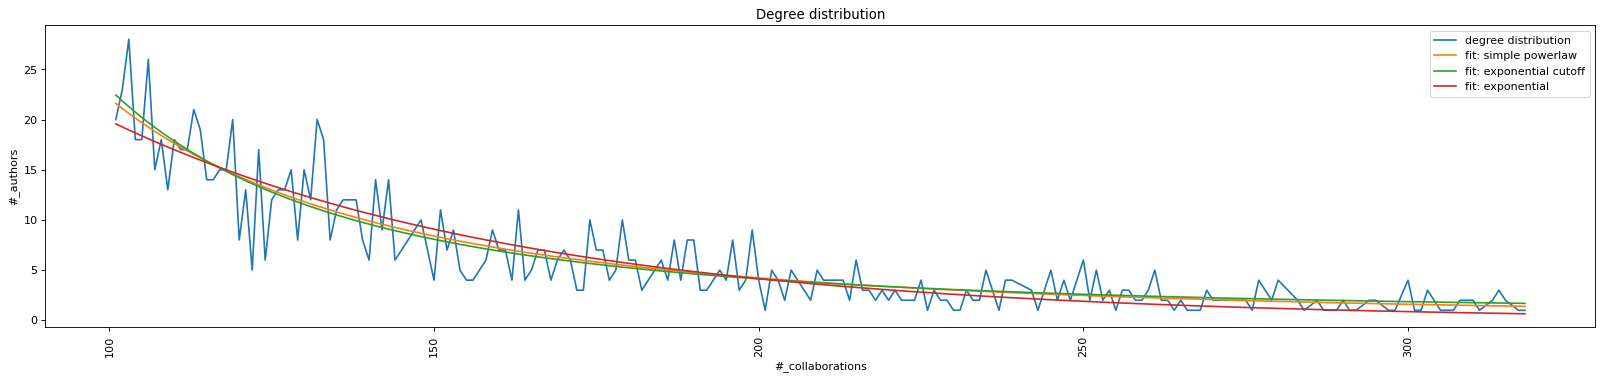

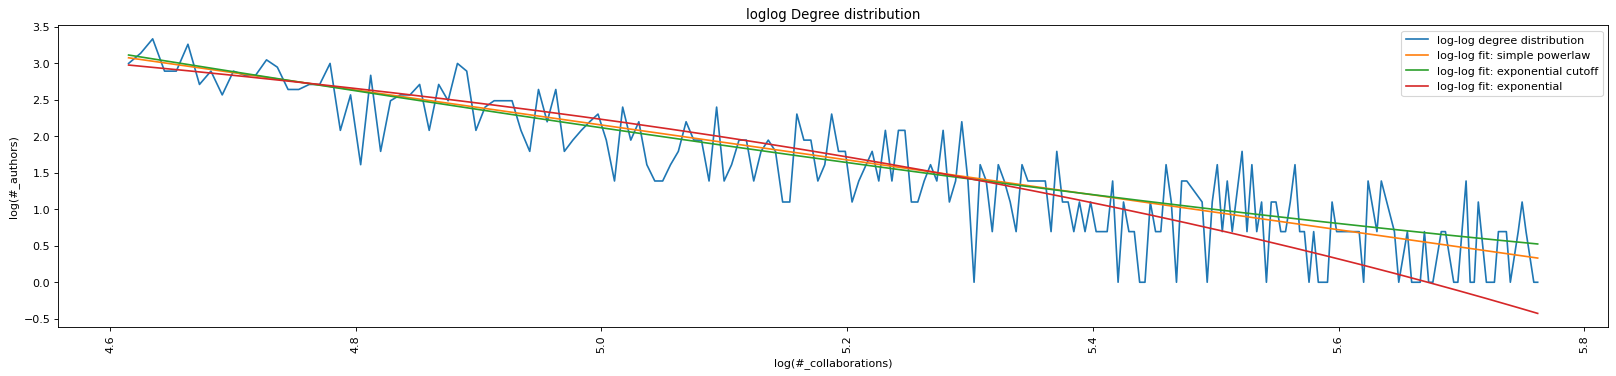

power law err: 47.93077443224841
exp err: 120.44688324986217
power law cutoff err: 28.23237140388269


In [50]:

draw("Degree distribution",  
     "#_collaborations", "#_authors", 
     x[:CHUNK], 
     [y[:CHUNK], my_powerlaw_Fit[:CHUNK], my_powerlaw_cutoff_Fit[:CHUNK], exp_fit[:CHUNK]], 
     ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff", "fit: exponential"], 
     25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", 
     np.log(x[:CHUNK]), 
     [np.log(y[:CHUNK]), np.log(my_powerlaw_Fit[:CHUNK]), np.log(my_powerlaw_cutoff_Fit[:CHUNK]), np.log(exp_fit[:CHUNK]) ], 
     ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff", "log-log fit: exponential"], 25, 5)


print("power law err:", err(my_powerlaw_Fit[CHUNK:], y[CHUNK:]))
print("exp err:", err(exp_fit[CHUNK:], y[CHUNK:]))
print("power law cutoff err:", err(my_powerlaw_cutoff_Fit[CHUNK:], y[CHUNK:]))

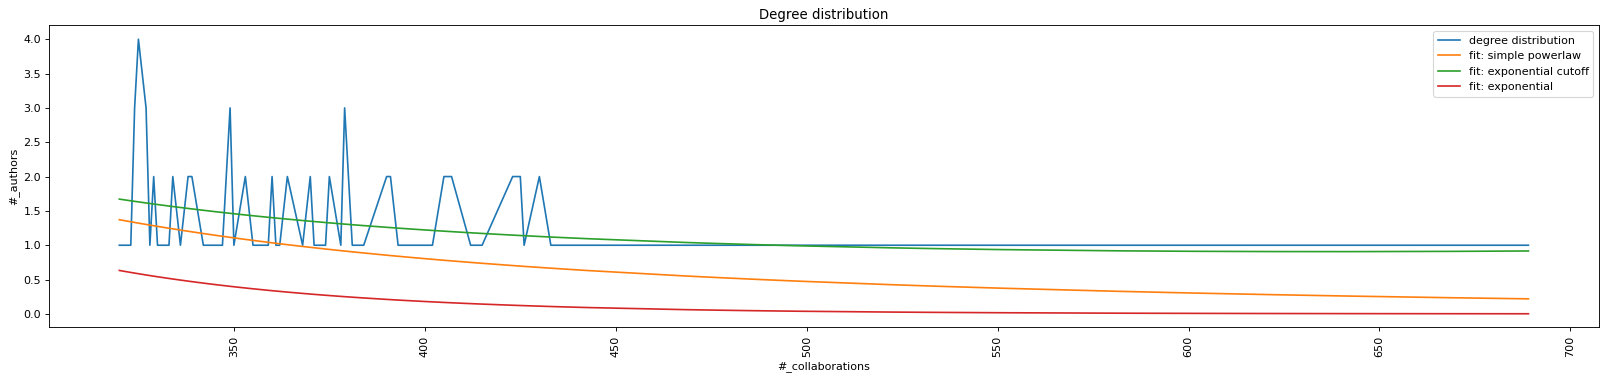

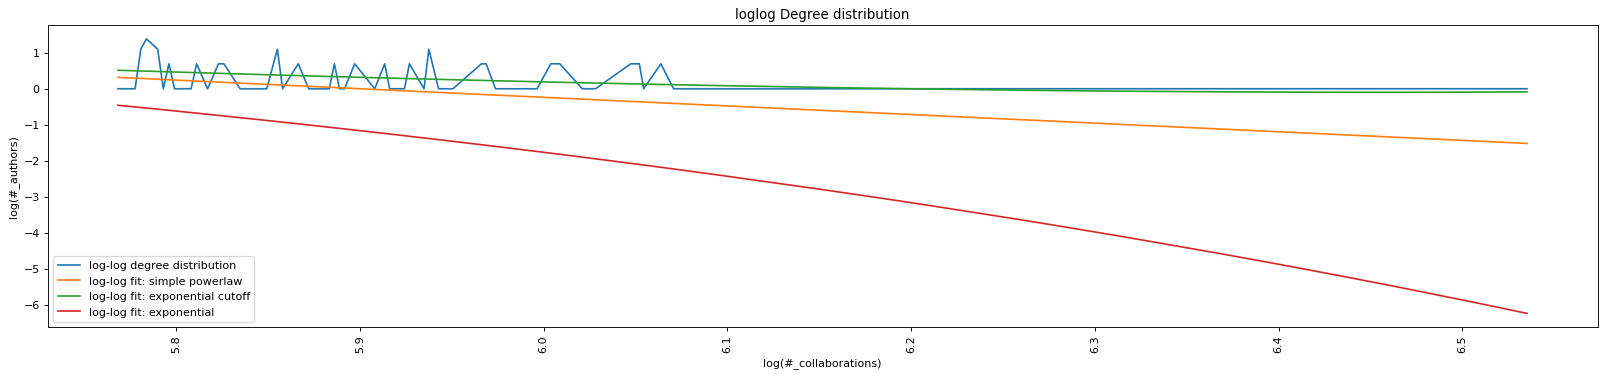

power law err: 1057.2788571223814
exp err: 1161.9464220136067
power law cutoff err: 1053.1282579675403


In [51]:

draw("Degree distribution",  
     "#_collaborations", "#_authors", 
     x[CHUNK:], 
     [y[CHUNK:], my_powerlaw_Fit[CHUNK:], my_powerlaw_cutoff_Fit[CHUNK:], exp_fit[CHUNK:]], 
     ["degree distribution", "fit: simple powerlaw", "fit: exponential cutoff", "fit: exponential"], 
     25, 5)
draw("loglog Degree distribution",  "log(#_collaborations)", "log(#_authors)", 
     np.log(x[CHUNK:]), 
     [np.log(y[CHUNK:]), np.log(my_powerlaw_Fit[CHUNK:]), np.log(my_powerlaw_cutoff_Fit[CHUNK:]), np.log(exp_fit[CHUNK:]) ], 
     ["log-log degree distribution", "log-log fit: simple powerlaw", "log-log fit: exponential cutoff", "log-log fit: exponential"], 25, 5)

print("power law err:", err(my_powerlaw_Fit[:CHUNK], y[:CHUNK]))
print("exp err:", err(exp_fit[:CHUNK], y[:CHUNK]))
print("power law cutoff err:", err(my_powerlaw_cutoff_Fit[:CHUNK], y[:CHUNK]))
